<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/la3-a8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy with k=1: 0.27
Accuracy with k=2: 0.32
Accuracy with k=3: 0.31
Accuracy with k=4: 0.31
Accuracy with k=5: 0.32
Accuracy with k=6: 0.32
Accuracy with k=7: 0.31
Accuracy with k=8: 0.30
Accuracy with k=9: 0.31
Accuracy with k=10: 0.32
Accuracy with k=11: 0.31


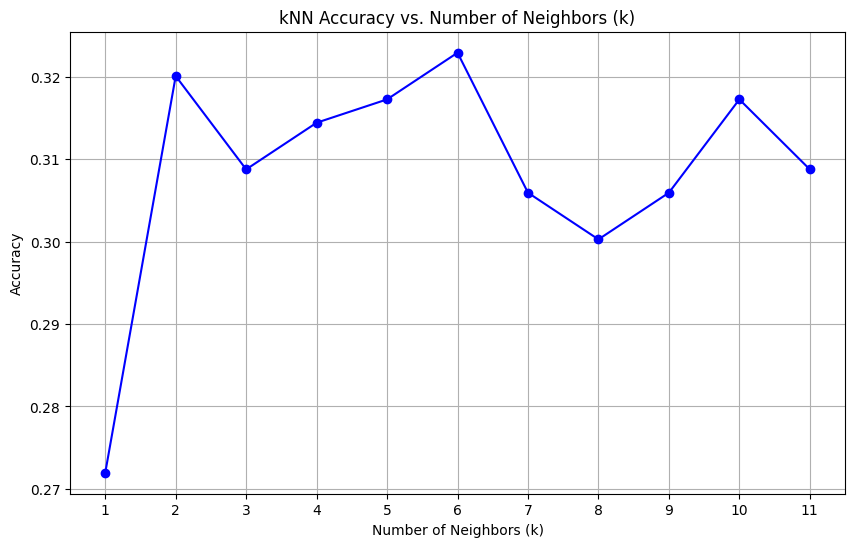


Comparison:
Accuracy with k=1: 0.27
Accuracy with k=3: 0.31


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/mnt/cc_embed_data.csv'  # Replace with the actual path to your dataset
df = pd.read_csv(file_path)

# Define the label column
label_column = 'Final_Marks'  # Replace with the actual name of your label column

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to evaluate kNN classifier
def evaluate_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# List to store accuracy values for different k
accuracy_list = []

# Evaluate kNN for k from 1 to 11
for k in range(1, 12):
    accuracy = evaluate_knn(k)
    accuracy_list.append(accuracy)
    print(f'Accuracy with k={k}: {accuracy:.2f}')

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

# Compare k=1 and k=3
accuracy_k1 = evaluate_knn(1)
accuracy_k3 = evaluate_knn(3)

print(f'\nComparison:\nAccuracy with k=1: {accuracy_k1:.2f}')
print(f'Accuracy with k=3: {accuracy_k3:.2f}')
